In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
torch.set_default_device('cpu')

import numpy as np

from transformers_simple.fcn import FCN
from transformers_simple.train import Trainer
from transformers_simple.dataset import CharDataset
from transformers_simple.char_util import generate_sample

In [2]:
N = 4

block_size  = 2
embed_size  = 6
hidden_size = 30
num_layers = 3

vocab_size  = 3
input_size = block_size*embed_size
output_size = vocab_size

log_interval = 50
epochs = 5
learning_rate = 1e-4
device = torch.device('cpu')

In [3]:
# #block size 1
# data = "".join(["abca"]*1000)

In [4]:
# block size 2
data = "".join(["aabcacb"]*1000)

In [5]:
Ns = int(len(data)*0.5)

data_train = data[:Ns]
data_test = data[Ns:]

dataset_train = CharDataset(data=data_train, block_size=block_size)
dataset_test = CharDataset(data=data_test, block_size=block_size)
dataset_train[0]

(tensor([0, 0]), tensor([0, 1]))

In [6]:
class AdapterNet(torch.nn.Module):
    def __init__(self, net):
        super(AdapterNet,self).__init__()
        self.net = net
        self.embedding = torch.nn.Embedding(num_embeddings=vocab_size, embedding_dim=embed_size)
        
    def forward(self, x):
        nb, l = x.size()

        o = self.embedding(x)
        o = o.view(nb,-1)
        o = self.net(o)

        return o
    
net = FCN(input_size=input_size, output_size=output_size, 
          hidden_size=hidden_size, num_layers=num_layers)

model = AdapterNet(net)

In [7]:
x = dataset_train[0][0].view(1,-1)

In [8]:
o = model(x)
o.size()

torch.Size([1, 3])

In [9]:
loss = torch.nn.CrossEntropyLoss()

def loss_fn(o,y):
    return loss(o,y[:,-1])

In [10]:
trainer = Trainer(model=model, 
                  dataset=dataset_train, 
                  loss_fn=loss_fn, 
                  batch_size=N, 
                  learning_rate=learning_rate,
                  epochs=epochs, 
                  log_interval=log_interval, 
                  device=device,
                    val_dataset=dataset_test,
                 val_interval=100)

In [11]:
trainer.run()

Train Epoch: 0 [0/3498 (0%)]	Loss: 1.088373


875it [00:00, 1643.02it/s]


Train Epoch: 0 [200/3498 (6%)]	Loss: 1.124328
Train Epoch: 0 [400/3498 (11%)]	Loss: 1.117201


875it [00:00, 1602.07it/s]


Train Epoch: 0 [600/3498 (17%)]	Loss: 1.059102
Train Epoch: 0 [800/3498 (23%)]	Loss: 1.095878


875it [00:00, 1661.44it/s]


Train Epoch: 0 [1000/3498 (29%)]	Loss: 1.057443
Train Epoch: 0 [1200/3498 (34%)]	Loss: 1.093249


875it [00:00, 1665.75it/s]


Train Epoch: 0 [1400/3498 (40%)]	Loss: 1.002247
Train Epoch: 0 [1600/3498 (46%)]	Loss: 0.984680


875it [00:00, 1642.81it/s]


Train Epoch: 0 [1800/3498 (51%)]	Loss: 0.977672
Train Epoch: 0 [2000/3498 (57%)]	Loss: 0.995229


875it [00:00, 1660.98it/s]


Train Epoch: 0 [2200/3498 (63%)]	Loss: 0.863992
Train Epoch: 0 [2400/3498 (69%)]	Loss: 0.598378


875it [00:00, 1665.31it/s]


Train Epoch: 0 [2600/3498 (74%)]	Loss: 0.911618
Train Epoch: 0 [2800/3498 (80%)]	Loss: 0.583908


875it [00:00, 1747.28it/s]


Train Epoch: 0 [3000/3498 (86%)]	Loss: 0.555772
Train Epoch: 0 [3200/3498 (91%)]	Loss: 0.532806


875it [00:00, 1669.07it/s]


Train Epoch: 0 [3400/3498 (97%)]	Loss: 0.089139
Train Epoch: 1 [0/3498 (0%)]	Loss: 0.259677


875it [00:00, 1729.66it/s]


Train Epoch: 1 [200/3498 (6%)]	Loss: 0.335821
Train Epoch: 1 [400/3498 (11%)]	Loss: 0.229916


875it [00:00, 1679.03it/s]


Train Epoch: 1 [600/3498 (17%)]	Loss: 0.109906
Train Epoch: 1 [800/3498 (23%)]	Loss: 0.130556


875it [00:00, 1687.91it/s]


Train Epoch: 1 [1000/3498 (29%)]	Loss: 0.085330
Train Epoch: 1 [1200/3498 (34%)]	Loss: 0.144508


875it [00:00, 1689.93it/s]


Train Epoch: 1 [1400/3498 (40%)]	Loss: 0.007867
Train Epoch: 1 [1600/3498 (46%)]	Loss: 0.038786


875it [00:00, 1695.26it/s]


Train Epoch: 1 [1800/3498 (51%)]	Loss: 0.030866
Train Epoch: 1 [2000/3498 (57%)]	Loss: 0.027135


875it [00:00, 1652.70it/s]


Train Epoch: 1 [2200/3498 (63%)]	Loss: 0.013651
Train Epoch: 1 [2400/3498 (69%)]	Loss: 0.008637


875it [00:00, 1651.24it/s]


Train Epoch: 1 [2600/3498 (74%)]	Loss: 0.016685
Train Epoch: 1 [2800/3498 (80%)]	Loss: 0.003879


875it [00:00, 1678.51it/s]


Train Epoch: 1 [3000/3498 (86%)]	Loss: 0.004912
Train Epoch: 1 [3200/3498 (91%)]	Loss: 0.012622


875it [00:00, 1685.01it/s]


Train Epoch: 1 [3400/3498 (97%)]	Loss: 0.006914
Train Epoch: 2 [0/3498 (0%)]	Loss: 0.007064


875it [00:00, 1691.12it/s]


Train Epoch: 2 [200/3498 (6%)]	Loss: 0.006307
Train Epoch: 2 [400/3498 (11%)]	Loss: 0.002057


875it [00:00, 1690.66it/s]


Train Epoch: 2 [600/3498 (17%)]	Loss: 0.005455
Train Epoch: 2 [800/3498 (23%)]	Loss: 0.005663


875it [00:00, 1694.66it/s]


Train Epoch: 2 [1000/3498 (29%)]	Loss: 0.002776
Train Epoch: 2 [1200/3498 (34%)]	Loss: 0.003710


875it [00:00, 1696.51it/s]


Train Epoch: 2 [1400/3498 (40%)]	Loss: 0.001358
Train Epoch: 2 [1600/3498 (46%)]	Loss: 0.002874


875it [00:00, 1691.10it/s]


Train Epoch: 2 [1800/3498 (51%)]	Loss: 0.001183
Train Epoch: 2 [2000/3498 (57%)]	Loss: 0.002314


875it [00:00, 1684.91it/s]


Train Epoch: 2 [2200/3498 (63%)]	Loss: 0.003447
Train Epoch: 2 [2400/3498 (69%)]	Loss: 0.001219


875it [00:00, 1582.05it/s]


Train Epoch: 2 [2600/3498 (74%)]	Loss: 0.001134
Train Epoch: 2 [2800/3498 (80%)]	Loss: 0.001600


875it [00:00, 1682.68it/s]


Train Epoch: 2 [3000/3498 (86%)]	Loss: 0.002255
Train Epoch: 2 [3200/3498 (91%)]	Loss: 0.001355


875it [00:00, 1681.21it/s]


Train Epoch: 2 [3400/3498 (97%)]	Loss: 0.001476
Train Epoch: 3 [0/3498 (0%)]	Loss: 0.000969


875it [00:00, 1692.21it/s]


Train Epoch: 3 [200/3498 (6%)]	Loss: 0.000590
Train Epoch: 3 [400/3498 (11%)]	Loss: 0.000925


875it [00:00, 1694.93it/s]


Train Epoch: 3 [600/3498 (17%)]	Loss: 0.000701
Train Epoch: 3 [800/3498 (23%)]	Loss: 0.000753


875it [00:00, 1691.22it/s]


Train Epoch: 3 [1000/3498 (29%)]	Loss: 0.000781
Train Epoch: 3 [1200/3498 (34%)]	Loss: 0.001256


875it [00:00, 1690.51it/s]


Train Epoch: 3 [1400/3498 (40%)]	Loss: 0.000578
Train Epoch: 3 [1600/3498 (46%)]	Loss: 0.000548


875it [00:00, 1695.22it/s]


Train Epoch: 3 [1800/3498 (51%)]	Loss: 0.000496
Train Epoch: 3 [2000/3498 (57%)]	Loss: 0.000489


875it [00:00, 1695.56it/s]


Train Epoch: 3 [2200/3498 (63%)]	Loss: 0.000306
Train Epoch: 3 [2400/3498 (69%)]	Loss: 0.000606


875it [00:00, 1685.06it/s]


Train Epoch: 3 [2600/3498 (74%)]	Loss: 0.000269
Train Epoch: 3 [2800/3498 (80%)]	Loss: 0.000468


875it [00:00, 1655.85it/s]


Train Epoch: 3 [3000/3498 (86%)]	Loss: 0.000539
Train Epoch: 3 [3200/3498 (91%)]	Loss: 0.000325


875it [00:00, 1648.80it/s]


Train Epoch: 3 [3400/3498 (97%)]	Loss: 0.000263
Train Epoch: 4 [0/3498 (0%)]	Loss: 0.000296


875it [00:00, 1681.45it/s]


Train Epoch: 4 [200/3498 (6%)]	Loss: 0.000521
Train Epoch: 4 [400/3498 (11%)]	Loss: 0.000412


875it [00:00, 1616.38it/s]


Train Epoch: 4 [600/3498 (17%)]	Loss: 0.000224
Train Epoch: 4 [800/3498 (23%)]	Loss: 0.000375


875it [00:00, 1723.91it/s]


Train Epoch: 4 [1000/3498 (29%)]	Loss: 0.000215
Train Epoch: 4 [1200/3498 (34%)]	Loss: 0.000172


875it [00:00, 1729.90it/s]


Train Epoch: 4 [1400/3498 (40%)]	Loss: 0.000304
Train Epoch: 4 [1600/3498 (46%)]	Loss: 0.000108


875it [00:00, 1699.43it/s]


Train Epoch: 4 [1800/3498 (51%)]	Loss: 0.000232
Train Epoch: 4 [2000/3498 (57%)]	Loss: 0.000153


875it [00:00, 1725.12it/s]


Train Epoch: 4 [2200/3498 (63%)]	Loss: 0.000191
Train Epoch: 4 [2400/3498 (69%)]	Loss: 0.000291


875it [00:00, 1721.39it/s]


Train Epoch: 4 [2600/3498 (74%)]	Loss: 0.000300
Train Epoch: 4 [2800/3498 (80%)]	Loss: 0.000289


875it [00:00, 1721.99it/s]


Train Epoch: 4 [3000/3498 (86%)]	Loss: 0.000232
Train Epoch: 4 [3200/3498 (91%)]	Loss: 0.000330


875it [00:00, 1717.80it/s]


Train Epoch: 4 [3400/3498 (97%)]	Loss: 0.000207


In [12]:
x = dataset_train[0][0].view(1,-1)

o = model(x)

In [13]:
torch.nn.functional.softmax(o, dim=1)

tensor([[2.1254e-04, 9.9958e-01, 2.1144e-04]], grad_fn=<SoftmaxBackward0>)

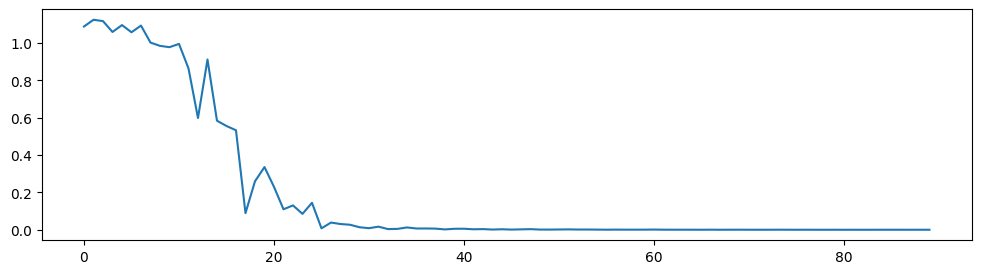

In [14]:
loss_history = trainer.loss_history

plt.figure(figsize=(12,3))
plt.plot(loss_history)
plt.show()

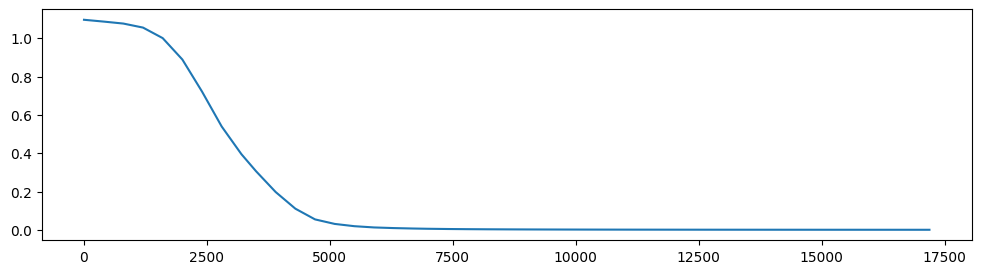

In [15]:
plt.figure(figsize=(12,3))
plt.plot(trainer.val_loss_iters, trainer.val_loss_history)
plt.show()

In [16]:
x = [0,1]
T = 20

o = generate_sample(x, model, length=T)

In [17]:
o

[2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0]